In [1]:
import os
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("combined-season-data.csv");

In [5]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,penalties_missed_pgw,penalties_saved_pgw,red_cards_pgw,result_pgw,saves_pgw,threat,threat_pgw,yellow_cards_pgw,total_points_pgw,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,2
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
bonus_pgw               float64
bps_pgw                 float64
clean_sheets_pgw        float64
creativity              float64
creativity_pgw          float64
goals_conceded_pgw      float64
goals_scored_pgw        float64
ict_index               float64
ict_index_pgw           float64
influence               float64
influence_pgw           float64
minutes_pgw             float64
own_goals_pgw           float64
penalties_missed_pgw    float64
penalties_saved_pgw     float64
red_cards_pgw           float64
result_pgw              float64
saves_pgw               float64
threat                  float64
threat_pgw              float64
yellow_cards_pgw        float64
total_po

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,70052.0,2017.033447,0.876808,2016.0,2016.0,2017.0,2018.0,2019.0
GW,70052.0,19.722064,11.300622,1.0,10.0,20.0,30.0,38.0
at_home,70052.0,0.499957,0.500004,0.0,0.0,0.0,1.0,1.0
player_id,70052.0,486.281819,295.168619,1.0,239.0,476.0,698.0,1258.0
opponent_id,70052.0,12.013147,7.237893,1.0,5.0,11.0,18.0,29.0
champion_ls,70052.0,0.050277,0.218517,0.0,0.0,0.0,0.0,1.0
top5_ls,70052.0,0.250328,0.433205,0.0,0.0,0.0,1.0,1.0
bottom5_ls,70052.0,0.249429,0.432686,0.0,0.0,0.0,0.0,1.0
promoted_ts,70052.0,0.149717,0.356797,0.0,0.0,0.0,0.0,1.0
assists_pgw,70052.0,0.039299,0.210799,0.0,0.0,0.0,0.0,3.0


In [8]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [9]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"].values.reshape(-1,1);

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=random_state)

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(regressor.coef_[0, ])})

In [13]:
coefficients

,Feature,Coefficients
0,at_home,0.170138
1,player_id,-0.000031
2,opponent_id,0.004174
3,champion_ls,0.023117
4,top5_ls,-0.189362
5,bottom5_ls,0.080470
6,promoted_ts,0.116119
7,assists_pgw,0.173571
8,bonus_pgw,-0.100652
9,bps_pgw,0.000479


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [16]:
test_df = pred_df.head(25)

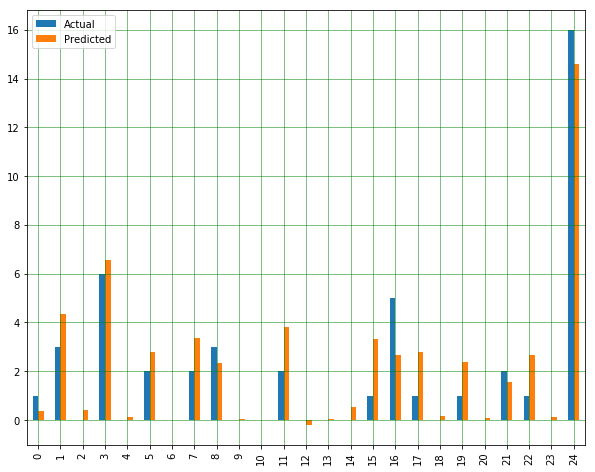

In [17]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7578594516074327
Mean Squared Error: 1.819605013897701
Root Mean Squared Error: 1.3489273567904614


In [19]:
# load and the test weekly fpl scrape
weekly_scrape = pd.read_csv("weekly-fpl-data.csv");

In [20]:
y_pred_weekly = regressor.predict(weekly_scrape);

In [21]:
y_pred_weekly_df = pd.DataFrame({'player_id': list(weekly_scrape["player_id"]), 'predicted': y_pred_weekly.flatten()})

In [22]:
y_pred_weekly_df

,player_id,predicted
0,176,31.645458
1,778,135.556494
2,820,140.923588
3,977,168.271547
4,841,149.069426
5,157,36.147694
6,822,140.551815
7,555,96.008102
8,191,32.741254
9,1249,214.356527
